In [4]:
import torch
import torch.utils.data

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from map_class import MapClass

In [7]:
#Training inputs for RGBcolors
rgb_colors = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]

In [8]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [9]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [21]:
# Network configuration

data = rgb_colors
batch_size = 4

length = 5
width = 4
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [11]:
def basic_visualization(map_):
    plt.imshow(map_);
    plt.colorbar()
    plt.show()

In [12]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    global dim
    dim = len(data[0])
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader

In [13]:
def map_view_for_coding(map_):
    return torch.transpose(map_, 0, 1).view(dim, length, width)
#     return map_.view(dim, length, width)

In [14]:
def map_display(map_):
#     return torch.transpose(map_, 0, 1).view(dim, length, width)
    if dim == 1:
        return map_.view(length, width)
    else:
        return map_.view(dim, length, width)

In [15]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [16]:
training = load_data(data)

In [17]:
map1 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


In [18]:
map1.map

tensor([[0.4788, 0.9833, 0.7120],
        [0.3199, 0.0491, 0.3240],
        [0.2116, 0.3984, 0.5015],
        [0.0860, 0.8961, 0.0857],
        [0.7969, 0.2491, 0.4021],
        [0.1210, 0.6613, 0.7704],
        [0.1687, 0.7598, 0.3323],
        [0.3161, 0.1589, 0.4224],
        [0.2857, 0.3216, 0.6134],
        [0.1733, 0.6971, 0.2241],
        [0.8401, 0.2514, 0.6401],
        [0.9792, 0.7515, 0.4402]])

In [19]:
map1.cycle(training)

In [20]:
map1.map

tensor([[0.6498, 0.6629, 0.8790],
        [0.1599, 0.0245, 0.1620],
        [0.0529, 0.0996, 0.6254],
        [0.0430, 0.9480, 0.0428],
        [0.8984, 0.1246, 0.2011],
        [0.0927, 0.6798, 0.9426],
        [0.1687, 0.7598, 0.3323],
        [0.3231, 0.2445, 0.3762],
        [0.4039, 0.4304, 0.5709],
        [0.1733, 0.6971, 0.2241],
        [0.9200, 0.1257, 0.8200],
        [0.9896, 0.8758, 0.2201]])

In [17]:
map1.distance_matrix

tensor([[0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361, 2.8284,
         3.0000, 3.1623, 3.6056],
        [1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361,
         3.1623, 3.0000, 3.1623],
        [2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000, 2.8284, 2.2361, 2.0000,
         3.6056, 3.1623, 3.0000],
        [1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361,
         2.0000, 2.2361, 2.8284],
        [1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142,
         2.2361, 2.0000, 2.2361],
        [2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000,
         2.8284, 2.2361, 2.0000],
        [2.0000, 2.2361, 2.8284, 1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000,
         1.0000, 1.4142, 2.2361],
        [2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000,
         1.4142, 1.0000, 1.4142],
        [2.8284, 2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000,

In [18]:
map1.impact_matrix

tensor([[1.0000, 0.6892, 0.4237, 0.6892, 0.5716, 0.3711, 0.4237, 0.3711, 0.2579,
         0.2301, 0.2059, 0.1492],
        [0.6892, 1.0000, 0.6892, 0.5716, 0.6892, 0.5716, 0.3711, 0.4237, 0.3711,
         0.2059, 0.2301, 0.2059],
        [0.4237, 0.6892, 1.0000, 0.3711, 0.5716, 0.6892, 0.2579, 0.3711, 0.4237,
         0.1492, 0.2059, 0.2301],
        [0.6892, 0.5716, 0.3711, 1.0000, 0.6892, 0.4237, 0.6892, 0.5716, 0.3711,
         0.4237, 0.3711, 0.2579],
        [0.5716, 0.6892, 0.5716, 0.6892, 1.0000, 0.6892, 0.5716, 0.6892, 0.5716,
         0.3711, 0.4237, 0.3711],
        [0.3711, 0.5716, 0.6892, 0.4237, 0.6892, 1.0000, 0.3711, 0.5716, 0.6892,
         0.2579, 0.3711, 0.4237],
        [0.4237, 0.3711, 0.2579, 0.6892, 0.5716, 0.3711, 1.0000, 0.6892, 0.4237,
         0.6892, 0.5716, 0.3711],
        [0.3711, 0.4237, 0.3711, 0.5716, 0.6892, 0.5716, 0.6892, 1.0000, 0.6892,
         0.5716, 0.6892, 0.5716],
        [0.2579, 0.3711, 0.4237, 0.3711, 0.5716, 0.6892, 0.4237, 0.6892, 1.0000,

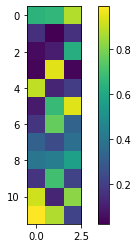

In [22]:
basic_visualization(map1.map)